In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas
import keras
from keras.layers import Dropout
from keras import initializers
from keras.optimizers import Adam

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/akhilp

In [3]:

col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","outcome"]

df = pd.read_csv("kddcup99.csv", header=None, names = col_names)

In [4]:
#fill in NAN values 
#fill forward, fills in NaN values with the last corressponding value before 
#NaN Value has been reached

df = df.fillna(method='ffill')

df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df.groupby('outcome')['outcome'].count()

outcome
back.                 2103
buffer_overflow.        12
ftp_write.               8
guess_passwd.           53
imap.                   12
ipsweep.               862
land.                   17
loadmodule.              8
multihop.                7
neptune.             41122
nmap.                  231
normal.              71225
perl.                    2
phf.                     3
pod.                   102
portsweep.             639
rootkit.                 7
satan.                1587
smurf.              197151
spy.                     2
teardrop.              397
warezclient.          1020
warezmaster.            20
Name: outcome, dtype: int64

In [6]:
#split into features and outcomes

x = df.drop(['outcome'], axis = 1 )
y = df[['outcome']]

In [7]:
x[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9.0,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19.0,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29.0,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39.0,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49.0,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [8]:
dummies_1= pd.get_dummies(x['protocol_type'])
dummies_2 = pd.get_dummies(x['service'])
dummies_3 = pd.get_dummies(x['flag'])

In [9]:
merged = pandas.concat([x, dummies_1], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column
x = merged.drop(['icmp','protocol_type'], axis = 1)


x[0:5]

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,tcp,udp
0,0,http,SF,181,5450,0,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,1,0
1,0,http,SF,239,486,0,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,1,0
2,0,http,SF,235,1337,0,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1,0
3,0,http,SF,219,1337,0,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,1,0
4,0,http,SF,217,2032,0,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,1,0


In [10]:
merged_1 = pandas.concat([x, dummies_2], axis = 'columns')

#dummy variable trap. Drop one dummy variable and original column

x = merged_1.drop(['whois','service'], axis = 1)

x[0:5]

,duration,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet
0,0,SF,181,5450,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,SF,239,486,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,SF,235,1337,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,SF,219,1337,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,SF,217,2032,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
merged_2 = pandas.concat([x, dummies_3], axis = 'columns')

x = merged_2.drop(['SH','flag'], axis = 1)

x[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
#turn malicious packets into true and normal into false

y['Target'] = y['outcome'] != 'normal.'
y = y.drop('outcome', axis=1)

/Users/akhilprasad/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Turn Outcomes into dummy variables 

dummies = pd.get_dummies(y['Target'])

# This will turn BENIGN values into 1 being False and all malicious packets into 0 being True. 
y = dummies.values

print(y)

[[1 0]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [15]:
# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(new_scaled_df)

x[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,-0.033283,-0.003424,0.105603,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-0.003078,-0.12043,-0.018473,-0.00562,-0.046905,-0.387647,-0.012055,-0.007328,-0.005332,0.416913
1,-0.033283,-0.003377,-0.017420,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-0.003078,-0.12043,-0.018473,-0.00562,-0.046905,-0.387647,-0.012055,-0.007328,-0.005332,0.416913
2,-0.033283,-0.003380,0.003670,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-0.003078,-0.12043,-0.018473,-0.00562,-0.046905,-0.387647,-0.012055,-0.007328,-0.005332,0.416913
3,-0.033283,-0.003393,0.003670,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-0.003078,-0.12043,-0.018473,-0.00562,-0.046905,-0.387647,-0.012055,-0.007328,-0.005332,0.416913
4,-0.033283,-0.003394,0.020894,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-0.003078,-0.12043,-0.018473,-0.00562,-0.046905,-0.387647,-0.012055,-0.007328,-0.005332,0.416913


In [17]:
#Perform PCA to reduce dimensionality of feature vector for better accuracy
#reduce from 115 to 2 dimensional space

pca=PCA(n_components = 2)
pca.fit(x)
x_scaled = pca.transform(x)
print ("Original Shape:   ", x.shape)
print ("Transformed Shape:",x_scaled.shape)

x = x_scaled

print(x)

Original Shape:    (316590, 115)
Transformed Shape: (316590, 2)
[[ 1.1446324   2.8572977 ]
 [ 1.13924674  2.84082852]
 [ 1.11484068  2.81575995]
 ...
 [-2.05211991 -0.8101949 ]
 [-2.05211991 -0.8101949 ]
 [-2.05211991 -0.8101949 ]]


In [18]:
#Split into test and training sets. 30% test sample 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(221613, 2)
(94977, 2)
(221613, 2)
(94977, 2)


In [33]:
# Create Neural Network, with 4 hidden layers and 1 output layer being subjected to the softmax probability function
# and 2 input layers which was reduced by PCA

model = Sequential()

model.add(Dense(200, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.5), bias_initializer = initializers.Constant(0.2)))
model.add(Dropout(0.2))
model.add(Dense(180, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.5),bias_initializer = initializers.Constant(0.2), )) 
model.add(Dropout(0.2))
model.add(Dense(120, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.5),bias_initializer = initializers.Constant(0.2), ))
model.add(Dropout(0.2))
model.add(Dense(60, input_dim = x.shape[1], activation='relu', kernel_initializer= initializers.he_normal(seed=0.5),bias_initializer = initializers.Constant(0.2), ))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1],activation='softmax')) #takes in an input and spits out 1D vector

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999)

#Add in hyper parameters
model.compile(loss='binary_crossentropy', metrics = ['accuracy'], optimizer = optimizer )
#Early stopping used to stop model from over or under fitting - stops when accuracy is no longer improving 
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=3, mode='auto', restore_best_weights=False, baseline=None)
#Fit the model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=100)

Train on 221613 samples, validate on 94977 samples
Epoch 1/100
221613/221613 [==============================] - 18s 80us/step - loss: 0.1185 - acc: 0.9707 - val_loss: 0.0630 - val_acc: 0.9846
Epoch 2/100
221613/221613 [==============================] - 17s 76us/step - loss: 0.0664 - acc: 0.9821 - val_loss: 0.0538 - val_acc: 0.9849
Epoch 3/100
221613/221613 [==============================] - 17s 77us/step - loss: 0.0565 - acc: 0.9844 - val_loss: 0.0476 - val_acc: 0.9872
Epoch 4/100
221613/221613 [==============================] - 17s 76us/step - loss: 0.0514 - acc: 0.9856 - val_loss: 0.0458 - val_acc: 0.9872
Epoch 5/100
221613/221613 [==============================] - 17s 77us/step - loss: 0.0494 - acc: 0.9863 - val_loss: 0.0453 - val_acc: 0.9874
Epoch 6/100
221613/221613 [==============================] - 17s 77us/step - loss: 0.0482 - acc: 0.9866 - val_loss: 0.0430 - val_acc: 0.9877
Epoch 7/100
221613/221613 [==============================] - 17s 77us/step - loss: 0.0467 - acc: 0.9869

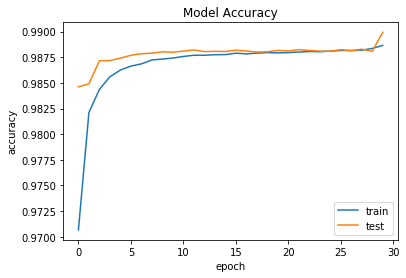

In [34]:
# plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


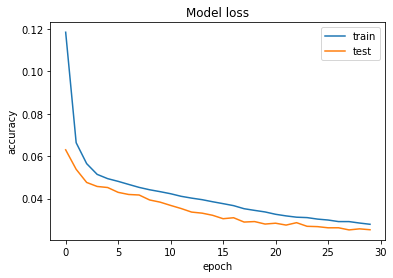

In [35]:
# plot training history
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [39]:
# Measure accuracy
predictors = model.predict(x_test)
predictors = np.argmax(predictors,axis=1)
prediction = np.argmax(y_test,axis=1)

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(prediction, predictors)

In [41]:
cm

array([[21145,   112],
       [  844, 72876]])

In [42]:

#True Positive (TP) : Observation is positive, and is predicted to be positive.
#False Negative (FN) : Observation is positive, but is predicted negative.
#True Negative (TN) : Observation is negative, and is predicted to be negative.
#False Positive (FP) : Observation is negative, but is predicted positive.

TP = 21145
FP = 112
FN = 844
TN = 72876

In [43]:
Acc = ((TP + TN)/(TP + TN + FP + FN))

print( "Accuracy:  ", Acc * 100, '%')

Accuracy:   98.99344051717785 %


In [44]:
# Precision

PPV = ((TP)/(TP+FP))

print("Precision", PPV * 100, '%')

Precision 99.47311473867431 %


In [45]:
# Recall 

TPR = ((TP)/(TP + FN))

print("Recall: ", TPR * 100, '%')

Recall:  96.16171722224749 %
